/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


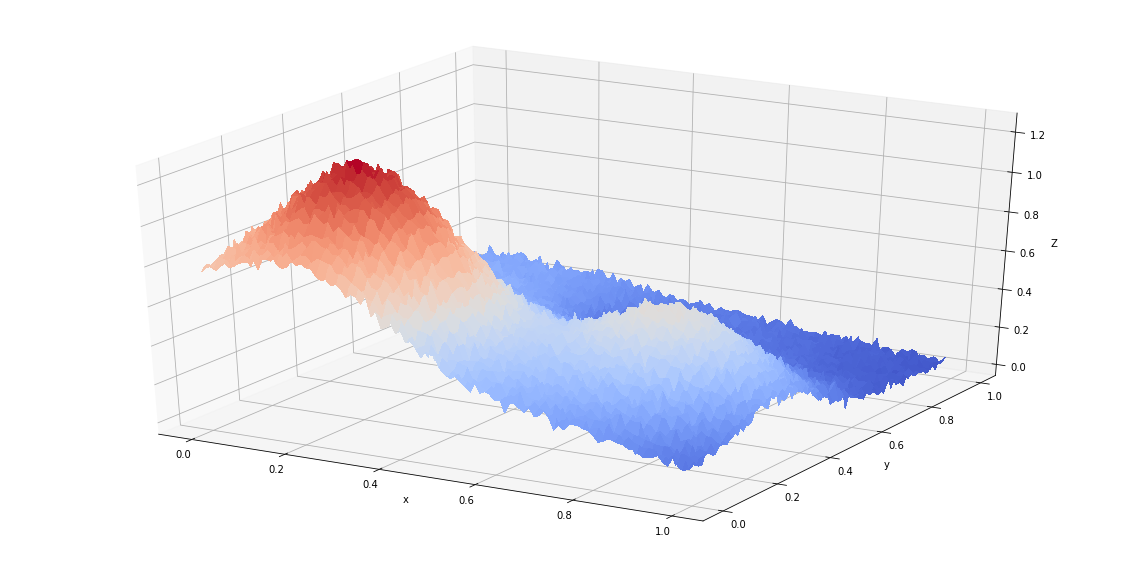

In [1]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
from random import random, seed, randrange
from scipy import stats
from functions1 import *
%matplotlib inline
seed=1

#Generating data
x = np.arange(0, 1, 0.01)
y = np.arange(0, 1, 0.01)

x, y = np.meshgrid(x,y)
z = FrankeFunction(x, y) +0.02*np.random.randn(100,100)
fig=plotTheSurface(x,y,z)
fig.show()

#Creating vectors of the generated data
xVector=np.matrix.flatten(x)
yVector=np.matrix.flatten(y)
zVector=np.matrix.flatten(z)
sizeVector=np.size(zVector)
matrixSize=np.size(y,0)

In [ ]:
# Divide data into a training set and a test set
indeces1=np.linspace(0,sizeVector-1,sizeVector)
train1,test1=train_test_split(indeces1, 0.7)
train1=train1.astype(int)
test1=test1.astype(int)
beta,Xinv=OSLregression(xVector[train1],yVector[train1],zVector[train1],3)
zPredict=computeZpredict(xVector[test1],yVector[test1],beta,3)
print(MSE(zVector[test1],zPredict))
print(r2score(zVector[test1],zPredict))
print(beta)
#confidence interval
CI=cofidentint(Xinv,zVector[test1],zPredict,beta)
print(CI)

In [2]:
# Creating folds for K-folds CV
indeces=np.linspace(0,sizeVector-1,sizeVector)
indeces=indeces.astype(int)
numberOfFolds=10
folds = k_folds_CV(indeces, numberOfFolds)

polynom_oders=[3,4,5]

In [ ]:

#OLS model
zPredictmatrix,statsMatrix,betaMatrix=olsModel(polynom_oders,xVector,yVector,zVector,numberOfFolds,folds,indeces)

#printing results
beta1=np.median(betaMatrix[:,:,2],1)
z_pred=computeZpredict(xVector,yVector,beta1,5)
bias,var=computeBiasandVar(zPredictmatrix[:,:,2],zVector)
print('Bias^2 for the final model is: ' + str(bias))
print('Var for the final model is: ' + str(var))
for j,order in enumerate(polynom_oders):
    print('STATS of MSE for polynom order {} is:'.format(str(order)))
    print(stats.describe(statsMatrix[0,:,j]))
    print('STATS of R2score for polynom order {} is:'.format(str(order)))
    print(stats.describe(statsMatrix[1,:,j]))
    print('\n')
#plot
matrixSize=np.size(y,0)
zPredictReshape=np.reshape(z_pred,(matrixSize,matrixSize))
fig1=plotTheSurface(x,y,zPredictReshape)
fig1.show()
#fig1.savefig('olsFranke.png')

print('bias of the final model ' + str(bias))
print('variance of the final model ' + str(var))


In [ ]:
#Ridge regression
alpha_values=[1e-3,1e-2,1e-1,1,10,1e2]
zPredictmatrix,statsMatrix,betaMatrix=ridge_regress(alpha_values,polynom_oders,xVector,yVector,zVector,numberOfFolds,folds,indeces)
for j,order in enumerate(polynom_oders):
    for  h,lbd in enumerate(alpha_values): 
        print(lbd)
        print('Average of MSE for polynom order {} is:'.format(str(order)) + str(np.mean(statsMatrix[0,:,h,j])))
        print('Average of R2score for polynom order {} is:'.format(str(order)) + str(np.mean(statsMatrix[1,:,h,j])))
        print('\n')
beta1=np.median(betaMatrix[:,:,0,2],1)
z_pred=computeZpredict(xVector,yVector,beta1,5)
bias,var=computeBiasandVar(zPredictmatrix[:,:,0,2],zVector)
print('Bias for the final model is: ' + str(bias))
print('Var for the final model is: ' + str(var))


In [4]:
#Lasso
alpha_values=[1e-3,1e-2,1e-1,1,10,1e2]
zPredictmatrix,statsMatrix,betaMatrix=lassoRegress(alpha_values,polynom_oders,xVector,yVector,zVector,numberOfFolds,folds,indeces)
for j,order in enumerate(polynom_oders):
    for  h,lbd in enumerate(alpha_values): 
        print(lbd)
        print('Average of MSE for polynom order {} is:'.format(str(order)) + str(np.mean(statsMatrix[0,:,h,j])))
        print('Average of R2score for polynom order {} is:'.format(str(order)) + str(np.mean(statsMatrix[1,:,h,j])))
        print('\n')
beta1=np.mean(betaMatrix[:,:,0,2],1)
z_pred=computeZpredict(xVector,yVector,beta1,5)
bias,var=computeBiasandVar(zPredictmatrix[:,:,0,2],zVector)
print('Bias for the final model is: ' + str(bias))
print('Var for the final model is: ' + str(var))

0.001
Average of MSE for polynom order 3 is:0.017956567817748566
Average of R2score for polynom order 3 is:0.7831107896960838


0.01
Average of MSE for polynom order 3 is:0.025304805668678515
Average of R2score for polynom order 3 is:0.6946514143575971


0.1
Average of MSE for polynom order 3 is:0.08296750862140335
Average of R2score for polynom order 3 is:-0.0014047726099199799


1
Average of MSE for polynom order 3 is:0.08296750862140335
Average of R2score for polynom order 3 is:-0.0014047726099199799


10
Average of MSE for polynom order 3 is:0.08296750862140335
Average of R2score for polynom order 3 is:-0.0014047726099199799


100.0
Average of MSE for polynom order 3 is:0.08296750862140335
Average of R2score for polynom order 3 is:-0.0014047726099199799


0.001
Average of MSE for polynom order 4 is:0.014220217622990217
Average of R2score for polynom order 4 is:0.8283021241209554


0.01
Average of MSE for polynom order 4 is:0.025304805668678515
Average of R2score for polynom order 4